In [18]:
import sys, os
sys.path.append("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import spacy
import re

## Dataset visualization

In [6]:
df = pd.read_csv("../data/fake_news_dataset.csv")

In [7]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Label distribution

/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

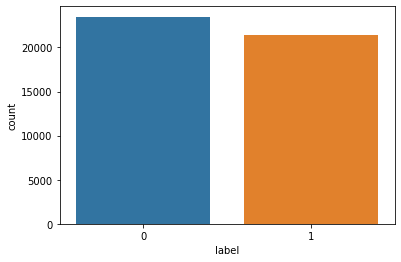

In [8]:
sns.countplot(df.label)

### Subject distribution

/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'News'),
 Text(1, 0, 'politics'),
 Text(2, 0, 'Government News'),
 Text(3, 0, 'left-news'),
 Text(4, 0, 'US_News'),
 Text(5, 0, 'Middle-east'),
 Text(6, 0, 'politicsNews'),
 Text(7, 0, 'worldnews')]

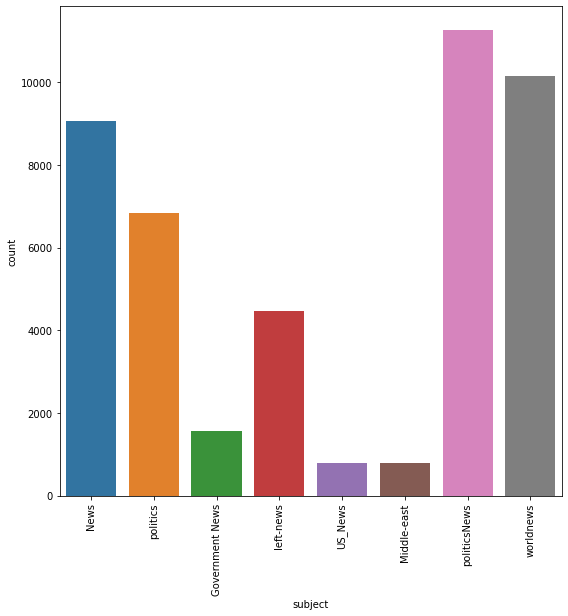

In [13]:
plt.figure(figsize=(9, 9))
chart = sns.countplot(df.subject)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

## Clean dataset

In [19]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
    
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
        
def clean_text(text):
    text = strip_html(text)
    return remove_between_square_brackets(text)

In [20]:
df['text']=df['text'].apply(clean_text)

/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=cJZFepSvxzM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=-7Tn4

/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://youtu.be/kKFQ5i9jXmA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=1RVqTfIKGbU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/louismanhes/anaconda3/envs/hdiyf/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/" looks like a URL. Beautiful Soup is not an HTTP client. You shou

In [22]:
df

,Unnamed: 0,title,text,subject,date,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...,...
44893,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [23]:
df.to_csv("../data/clean_fake_news_dataset.csv")